In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def load_and_clean_data(filepath):
    # Load the dataset
    df = pd.read_csv(filepath)

    # Clean column names (remove leading/trailing spaces)
    df.columns = df.columns.str.strip()

    # Drop rows with missing values
    df.dropna(inplace=True)

    # Clean categorical columns
    if 'Frequency' in df.columns:
        df['Frequency'] = df['Frequency'].astype(str).str.strip()
    if 'Area' in df.columns:
        df['Area'] = df['Area'].astype(str).str.strip()

    # Convert Date column
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

    # Extract temporal features
    df['Month'] = df['Date'].dt.month_name()
    df['Year'] = df['Date'].dt.year
    df['Month_Year'] = df['Date'].dt.to_period('M').astype(str)

    return df

In [8]:
def create_sidebar_graph(df):
    print("Generating Overall Side Bar Graph...")

    # Group data by Region and Month_Year
    df_grouped = df.groupby(['Region', 'Month_Year'])['Estimated Unemployment Rate (%)'].mean().reset_index()

    # Sort for better visualization
    df_grouped = df_grouped.sort_values(by=['Region', 'Month_Year'])

    # Plotting
    plt.figure(figsize=(12, 30))  # Tall figure to accommodate all states
    sns.barplot(
        data=df_grouped,
        x='Estimated Unemployment Rate (%)',
        y='Region',
        hue='Month_Year',
        palette='viridis'
    )
    plt.title('Unemployment Rate by State and Month')
    plt.xlabel('Unemployment Rate (%)')
    plt.ylabel('State')
    # Move legend outside the plot
    plt.legend(title='Month-Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [9]:
def visualize_data(df):
    sns.set_style("whitegrid")

    # 1. Overall Trend
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)')
    plt.title('Overall Unemployment Rate Trend')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 2. Rural vs Urban Trend
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Area')
    plt.title('Rural vs Urban Unemployment Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

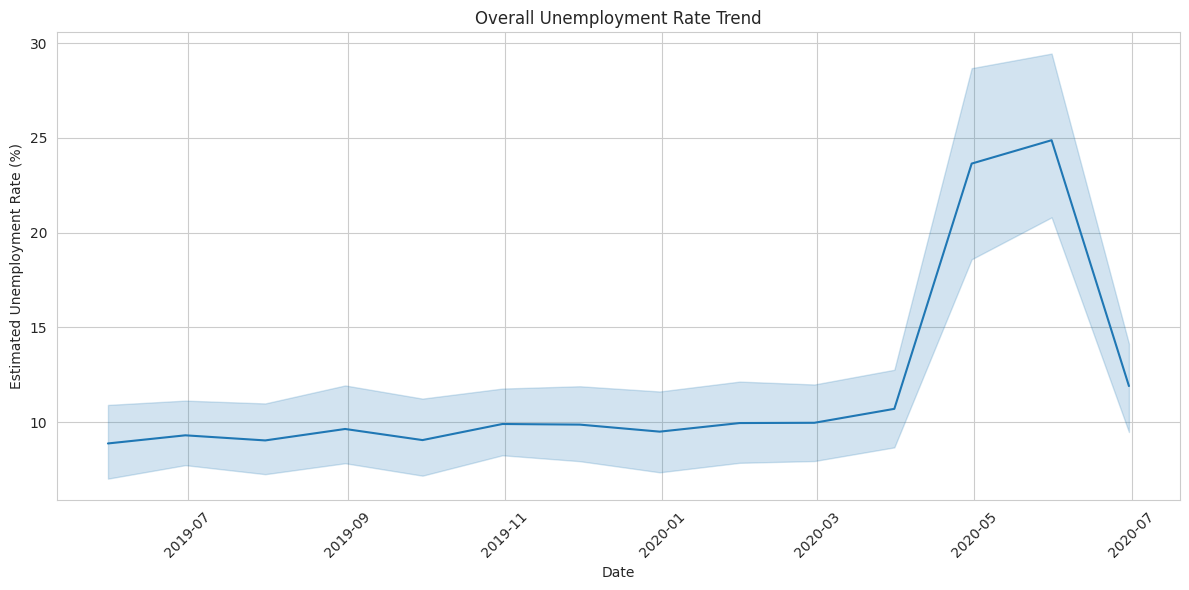

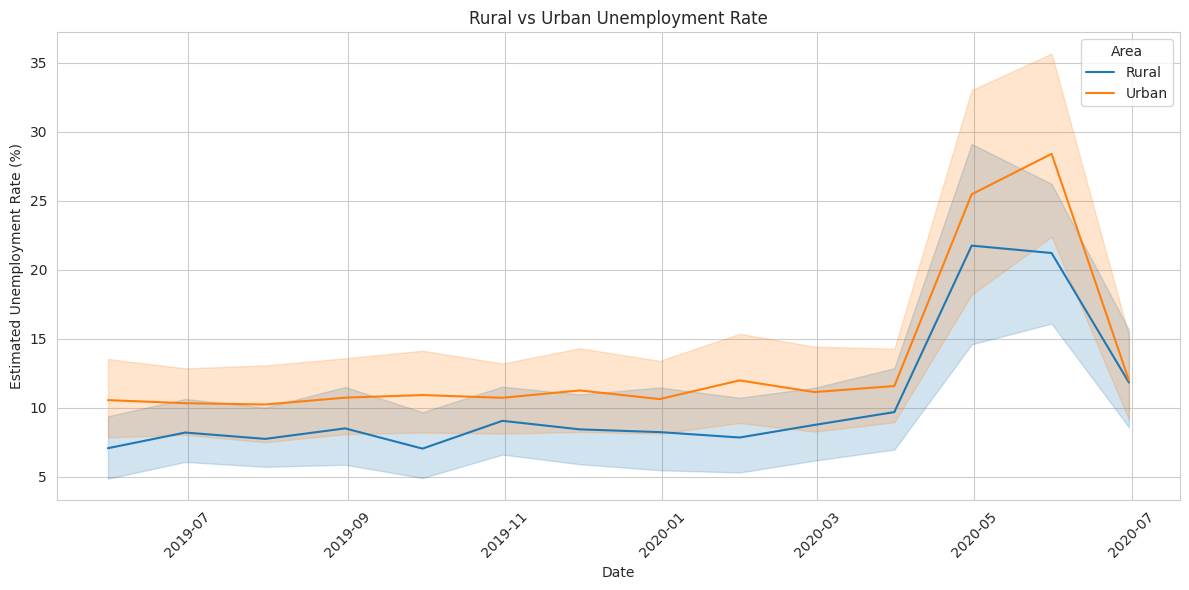

Generating Overall Side Bar Graph...


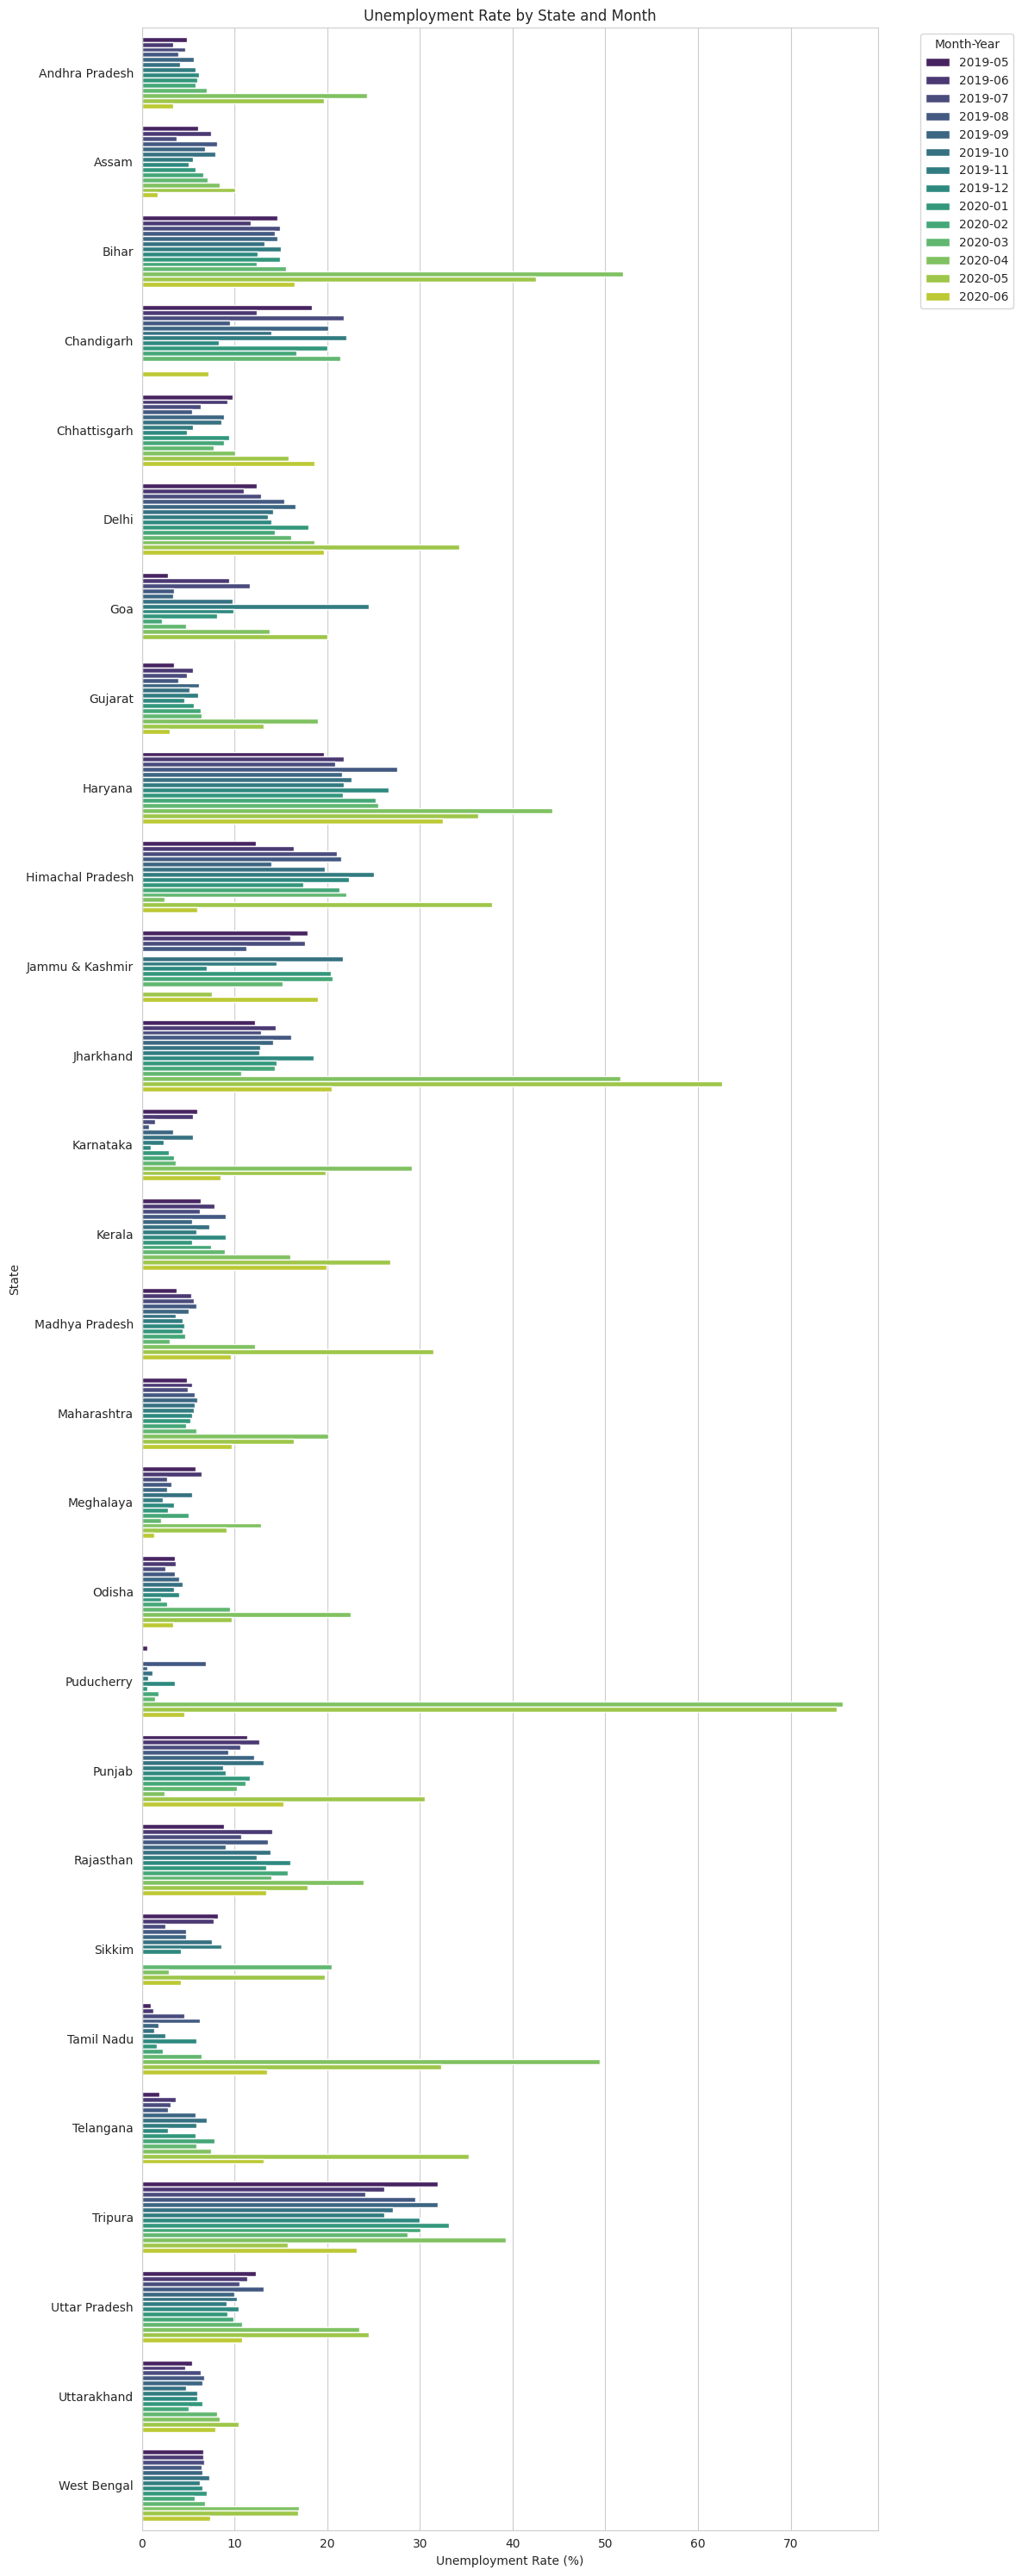

Analysis successfully completed.


In [10]:
def main():
    file_path = "/content/Unemployment in India.csv"

    try:
        # Load and process data
        df = load_and_clean_data(file_path)

        # Generate Visualizations
        visualize_data(df)
        create_sidebar_graph(df)

        print("Analysis successfully completed.")

    except FileNotFoundError:
        print("Error: File not found. Please ensure 'Unemployment in India.csv' is in the same directory.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    main()